In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
from datetime import datetime

# Initialize Sentiment Analyzer 
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "jCuMds8hkjry8JV8JDEuDVH9o"
consumer_secret = "psgKB7nb05kZqoD2ZFPrG78OqbObHySWUEhcLFcZ03qVMlsCwp"
access_token = "814999527451148288-PVho6BBmmcQbSVKOHBt3E5jbPJM6Krl"
access_token_secret = "a30jMaE70P2kefPFOzrfGTlA06okUcifkjJB9g2JWq4Ih"

In [7]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Select News Sources (Twitter Accounts)
news_orgs = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]

# Create arrays to hold sentiments for all news organizations
source_tweets=[]
text_tweets=[]

# Loop through all target news organizations
for org in news_orgs:
    
    # Reset counter for each news_org loop
    counter=1
    
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    # Run search for each tweet
    public_tweets = api.search(org, count=100, result_type="recent",lang='en')       
    #print(json.dumps(public_tweets["statuses"], indent=4, sort_keys=True, separators=(',',': ')))   
    
    # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]

        # Add each value to the appropriate arrays above
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)  
        #print(org)
        #print (compound_list, tweets_ago)
        #print(" ")
        
        # Append all sentiments to an array
        source_tweets.append({" Media" : org,
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweets_Ago": counter
                            })  
        # Add 1 to counter    
        counter+=1
        
    # Store the Average Sentiments into the array created above
    text_tweets.append({" Media": org,
                    "Compound_Mean": np.mean(compound_list),
                    "Positive": np.mean(positive_list),
                    "Neutral": np.mean(negative_list),
                    "Negative": np.mean(neutral_list),
                    "Count": len(compound_list)
                    })

# Convert all_sentiments to DataFrame
source_tweets_pd = pd.DataFrame.from_dict(source_tweets)
source_tweets_pd.to_csv("tweets_array_pd.csv")
display(source_tweets_pd)
#print(all_sentiments_pd.dtypes)

# Convert sentiment_means to DataFrame 
text_tweets_pd = pd.DataFrame.from_dict(text_tweets) 
display(text_tweets_pd)

,Media,Compound,Date,Negative,Neutral,Positive,Tweets_Ago
0,FoxNews,0.2500,Thu Jan 03 05:21:00 +0000 2019,0.000,0.905,0.095,1
1,FoxNews,0.7704,Thu Jan 03 05:20:58 +0000 2019,0.000,0.729,0.271,2
2,FoxNews,-0.1280,Thu Jan 03 05:20:57 +0000 2019,0.073,0.927,0.000,3
3,FoxNews,0.7704,Thu Jan 03 05:20:57 +0000 2019,0.000,0.729,0.271,4
4,FoxNews,-0.6562,Thu Jan 03 05:20:56 +0000 2019,0.208,0.710,0.082,5
5,FoxNews,-0.5423,Thu Jan 03 05:20:55 +0000 2019,0.230,0.704,0.066,6
6,FoxNews,0.0000,Thu Jan 03 05:20:55 +0000 2019,0.000,1.000,0.000,7
7,FoxNews,0.7704,Thu Jan 03 05:20:54 +0000 2019,0.000,0.729,0.271,8
8,FoxNews,-0.1280,Thu Jan 03 05:20:54 +0000 2019,0.073,0.927,0.000,9
9,FoxNews,0.3182,Thu Jan 03 05:20:54 +0000 2019,0.000,0.845,0.155,10


,Media,Compound_Mean,Count,Negative,Neutral,Positive
0,FoxNews,-0.121359,100,0.849080,0.095950,0.054950
1,CNN,-0.060089,100,0.840730,0.091960,0.067310
2,BBCWorld,0.083960,98,0.827337,0.069582,0.103071
3,CBSNews,-0.055108,100,0.799430,0.121840,0.078700
4,nytimes,0.007978,100,0.850500,0.071480,0.078020


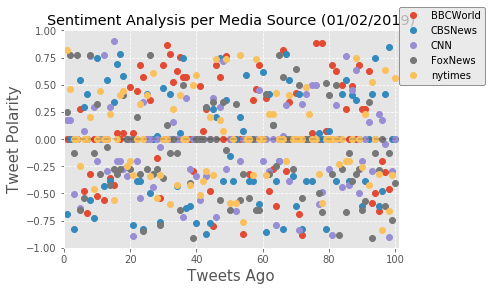

In [8]:
# Create a scatterplot
source_tweets_pd.set_index('Tweets_Ago', inplace=True)
source_tweets_pd.groupby(' Media')['Compound'].plot(legend=True, marker = 'o', linewidth=0)

# Customize scatterplot features
plt.style.use('ggplot')
plt.axhline(c='k', alpha=0.2, linestyle= 'dashed')
plt.axis([0,6,-1.1,1.1])
plt.xlim(0,101)
plt.ylim(-1,1)
plt.xlabel("Tweets Ago", fontsize=15)
plt.ylabel("Tweet Polarity", fontsize=15)
plt.legend(loc=(1.0, 0.75),edgecolor='black')
plt.grid(True, ls='dashed')
plt.title("Sentiment Analysis per Media Source" + " "+ "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.savefig("Sentiment Analysis of Media Tweets.png",bbox_inches='tight')
plt.show()


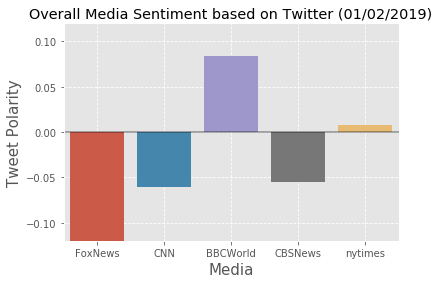

In [9]:
# Create a barplot
ax=sns.barplot(x=' Media', y='Compound_Mean', data=text_tweets_pd)

# Customize barplot features
ax.set_xlabel('Media', fontsize=15)
ax.set_ylabel('Tweet Polarity', fontsize=15)
ax.set_title("Overall Media Sentiment based on Twitter"+ " "+ "(" + datetime.now().strftime('%m/%d/%Y') + ")")
ax.set_ylim(-0.12, 0.12)
ax.grid(True, ls='dashed')
ax.hlines(0, -1, 10, colors='k', alpha=0.4)
plt.savefig("Overall Sentiment based on Twitter.png")
plt.show()